## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

#### Read the iris.csv file

In [72]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB,

import random

In [2]:
iris=pd.read_csv("iris.csv")

In [3]:
iris.head()
iris.shape

(152, 6)

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
iris.isnull().sum()

##Since there are very few missing values in the dataset, we would 
##Be simply filling the missing values with the median of these columns

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# SepalLengthCm    1
# SepalWidthCm     2
# PetalLengthCm    2
# PetalWidthCm     1

iris["SepalLengthCm"].fillna(iris["SepalLengthCm"].median(), inplace=True)
iris["SepalWidthCm"].fillna(iris["SepalWidthCm"].median(), inplace=True)
iris["PetalLengthCm"].fillna(iris["PetalLengthCm"].median(), inplace=True)
iris["PetalWidthCm"].fillna(iris["PetalWidthCm"].median(), inplace=True)


In [7]:
iris["SepalLengthCm"].median


<bound method NDFrame._add_numeric_operations.<locals>.median of 0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
147    6.5
148    6.2
149    5.9
150    5.9
151    5.8
Name: SepalLengthCm, Length: 152, dtype: float64>

In [8]:
iris.isnull().sum()


# Hence we have now dealt with all the missing values in the dataset.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [9]:
## Encoding the Species column as suggested.

In [10]:
iris["Species"]=iris.Species.map({"Iris-virginica":0, "Iris-setosa":1,"Iris-versicolor":2})

#here
# "Iris-virginica":0,
# "Iris-setosa":1,
# "Iris-versicolor":2


In [11]:
iris.Species.value_counts()

0    52
1    50
2    50
Name: Species, dtype: int64

In [12]:
iris.head()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             152 non-null    int64  
 1   SepalLengthCm  152 non-null    float64
 2   SepalWidthCm   152 non-null    float64
 3   PetalLengthCm  152 non-null    float64
 4   PetalWidthCm   152 non-null    float64
 5   Species        152 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [13]:
iris.corr()

## Here since we see that none of the independent variables have correlation
## In the range -0.1 to 0.1 so we let the columns be and dont drop any.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,-0.485106
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,-0.319507
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.188831
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,-0.302167
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,-0.378630
Species,-0.485106,-0.319507,-0.188831,-0.302167,-0.378630,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [16]:
iris.var()

## Here again we do not see the variance lower than 0.1 so we would not drop any column

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

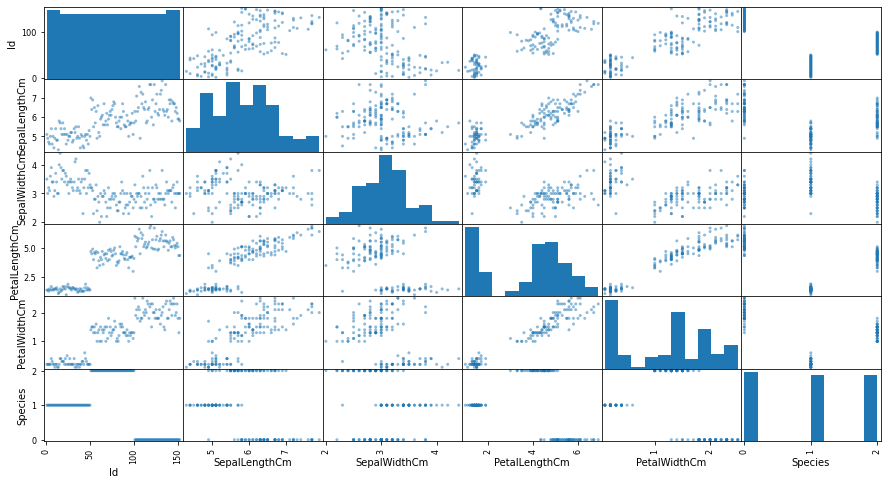

In [55]:
plt.rcParams['figure.figsize'] = [15,8]

pd.plotting.scatter_matrix(iris)
plt.show()

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [22]:
x=iris.drop("Species", axis=1)
y=iris["Species"]

In [23]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=10, test_size=0.2)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [35]:
##checking with k=3

knn=KNeighborsClassifier(n_neighbors=3, metric="euclidean")

knn_model=knn.fit(x_train,y_train)

y_pred=knn_model.predict(x_test)

print("Accuracy", accuracy_score(y_test,y_pred))

Accuracy 1.0


In [34]:
##checking with k=5


knn=KNeighborsClassifier(n_neighbors=5)

knn_model=knn.fit(x_train,y_train)

y_pred=knn_model.predict(x_test)

print("Accuracy", accuracy_score(y_test,y_pred))

Accuracy 1.0


In [33]:
##checking with k=9


knn=KNeighborsClassifier(n_neighbors=9)

knn_model=knn.fit(x_train,y_train)

y_pred=knn_model.predict(x_test)

print("Accuracy", accuracy_score(y_test,y_pred))

Accuracy 1.0


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

In [41]:
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 19, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}

knn_classification = KNeighborsClassifier(n_jobs=-1)


# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 3, 
                        scoring = 'accuracy', 
                        n_jobs=-1)


knn_grid.fit(x_train, y_train)


print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 7} 



Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [42]:
#Here as we note that the heighest accuracy has been acheived with n_neighbors =7
## Thus we can conclude that the Misclassification error for the same
## is : 

print("Misclassification error (MSE) = ", 1-accuracy_score(y_test,y_pred))

Misclassification error (MSE) =  0.0


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

1
[0.38461538 0.58333333 0.66666667 0.33333333 0.25       0.66666667
 0.16666667 0.33333333 0.41666667 0.41666667]
3
[0.38461538 0.75       0.41666667 0.41666667 0.25       0.58333333
 0.16666667 0.41666667 0.33333333 0.41666667]
5
[0.53846154 0.5        0.41666667 0.33333333 0.16666667 0.41666667
 0.5        0.33333333 0.25       0.41666667]
7
[0.46153846 0.5        0.41666667 0.33333333 0.25       0.5
 0.5        0.33333333 0.5        0.5       ]
9
[0.38461538 0.5        0.41666667 0.41666667 0.25       0.41666667
 0.58333333 0.33333333 0.33333333 0.5       ]
11
[0.38461538 0.58333333 0.41666667 0.33333333 0.08333333 0.5
 0.33333333 0.16666667 0.25       0.41666667]
13
[0.53846154 0.83333333 0.41666667 0.41666667 0.25       0.33333333
 0.33333333 0.33333333 0.25       0.58333333]
15
[0.53846154 0.75       0.41666667 0.5        0.25       0.33333333
 0.41666667 0.5        0.25       0.5       ]
17
[0.46153846 0.66666667 0.25       0.41666667 0.33333333 0.33333333
 0.25       0.4166666

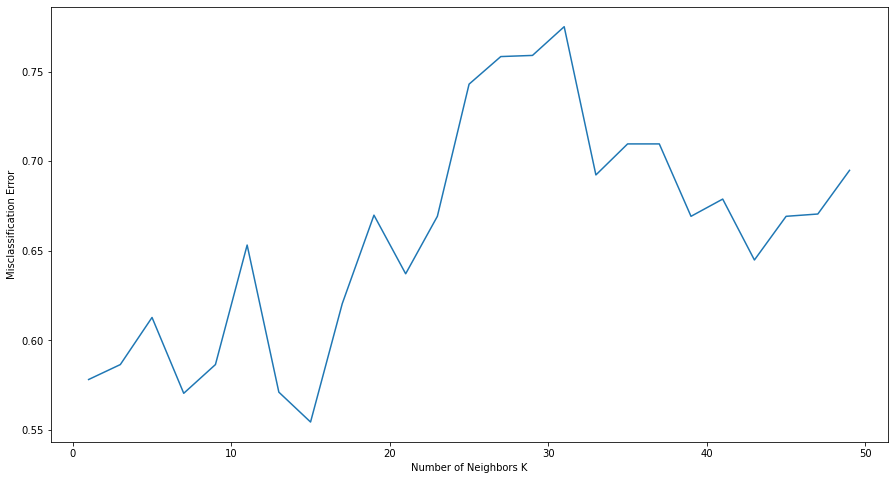

None


In [80]:
from sklearn.model_selection import cross_val_score
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    print(scores)
    cv_scores.append(scores.mean())


# changing to misclassification error
MSE = np.array([1 - x for x in cv_scores])

neighbors = list(filter(lambda x: x % 2 != 0, myList))
neighbors = np.array(neighbors)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

print(plt.show())


# Naive Bayes

### Question 1
#### Import Iris.csv

### Question 2
#### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [43]:
x=iris.drop("Species", axis=1)
y=iris["Species"]

In [45]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [44]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=10, test_size=0.2)

## Question 3
#### Find the distribution of target variable (Class)
#### And, Plot the distribution of target variable using histogram

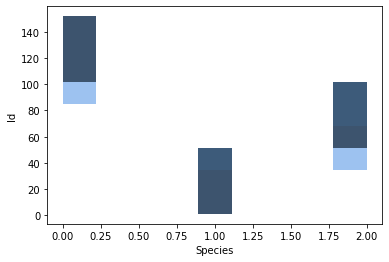

In [50]:
import matplotlib.pyplot as plt


sns.histplot(data=iris, x="Species", y="Id")
plt.show()

### Plot the distribution of target variable using histogram

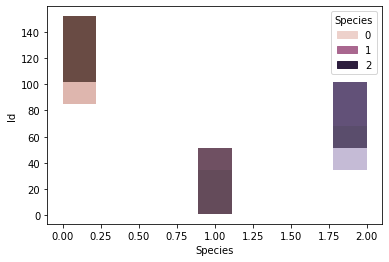

In [52]:
sns.histplot(data=iris, x="Species", y="Id", hue="Species")
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it.

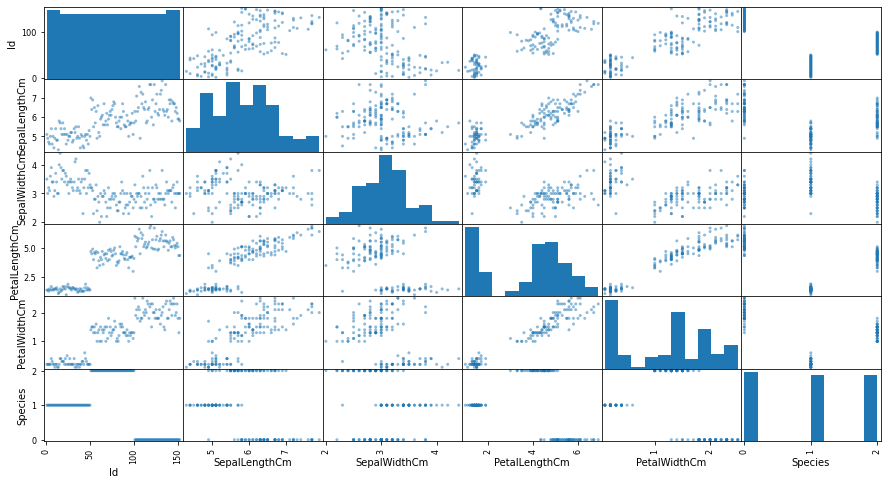

In [57]:
plt.rcParams['figure.figsize'] = [15,8]

pd.plotting.scatter_matrix(iris)
plt.show()


### Question 3
#### Find Correlation among all variables and give your insights 

In [58]:
iris.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,-0.485106
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,-0.319507
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.188831
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,-0.302167
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,-0.378630
Species,-0.485106,-0.319507,-0.188831,-0.302167,-0.378630,1.000000


### Question 4
#### Split data in Training and Validation in 80:20

In [60]:
X=iris.drop(columns="Species", axis=1)
y=iris["Species"]

In [61]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=22)

### Question 5
#### Do Feature Scaling 

In [65]:

x_scaler = StandardScaler()

num_scaled= x_scaler.fit_transform(X)

Feat_X= pd.DataFrame(num_scaled, columns=X.columns)

Feat_X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720693,-0.90675,1.040463,-1.353632,-1.325008
1,-1.697902,-1.15069,-0.124120,-1.353632,-1.325008
2,-1.675112,-1.39463,0.341713,-1.410833,-1.325008
3,-1.652321,-1.51660,0.108797,-1.296431,-1.325008
4,-1.629530,-1.02872,1.273380,-1.353632,-1.325008


### Question 6 
#### Train and Fit NaiveBayes Model

In [66]:
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

# predict the attrition for test set
y_pred = gnb_model.predict(X_test)

# print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



### Question 7
#### Print Accuracy and Confusion Matrix and Conclude your findings

In [69]:
gnb = GaussianNB()
   
# fit the model using 'cross_val_score'
# pass the gnb model as 'estimator'
# use 10-fold cross validation
score = cross_val_score(gnb, X_train, y_train, cv = 10)

# calculate the mean score
score = score.mean()

print("Accuracy after 10 fold cross validation: ", round(score, 2))

Accuracy after 10 fold cross validation:  0.99
